## Title :
Exercise: Visualization Improvisation

## Description :

For this exercise we would like you to get creative and experiment!  

**You have the freedom to plot anything that you'd like from this data**. You're expected to produce **two plots**, both of which should adhere to the principles learned in lecture (e.g., make it clear to understand/digest, effective, simple, not misleading, etc). 

Please feel inspired to challenge yourself by making a type of plot you've never made before -- perhaps never even seen before! Give a brief explanation of the reason and usefulness of the plot.

Your data is the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston" target="_blank">Boston housing prices dataset</a>. We will load it directly from sklearn  

**Resource**: for tons of great coding examples, visit the <a href="https://matplotlib.org/gallery/index.html" target="_blank">matplotlib</a> website.

# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109A Introduction to Data Science 

## Lecture 14, Exercise: Visualization


**Harvard University**<br/>
**Fall 2020**<br/>
**Instructors**: Pavlos Protopapas, Kevin Rader, and Chris Tanner

---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
url = "https://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(url, sep=r"\s+", skiprows=22, header=None)

X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE",
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]
df = pd.DataFrame(X, columns=feature_names)
df["MEDV"] = y

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


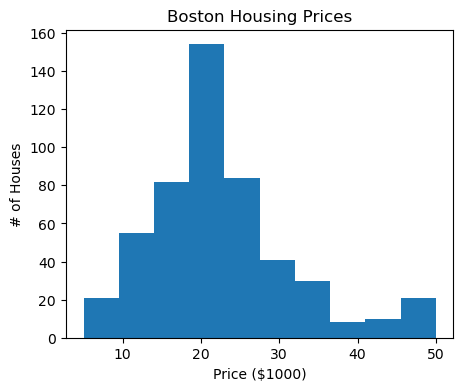

In [3]:
# our canonical example
plt.figure(figsize=(5, 4))
plt.hist(df.MEDV)
plt.title('Boston Housing Prices')
plt.xlabel('Price ($1000)')
plt.ylabel('# of Houses')
plt.show()


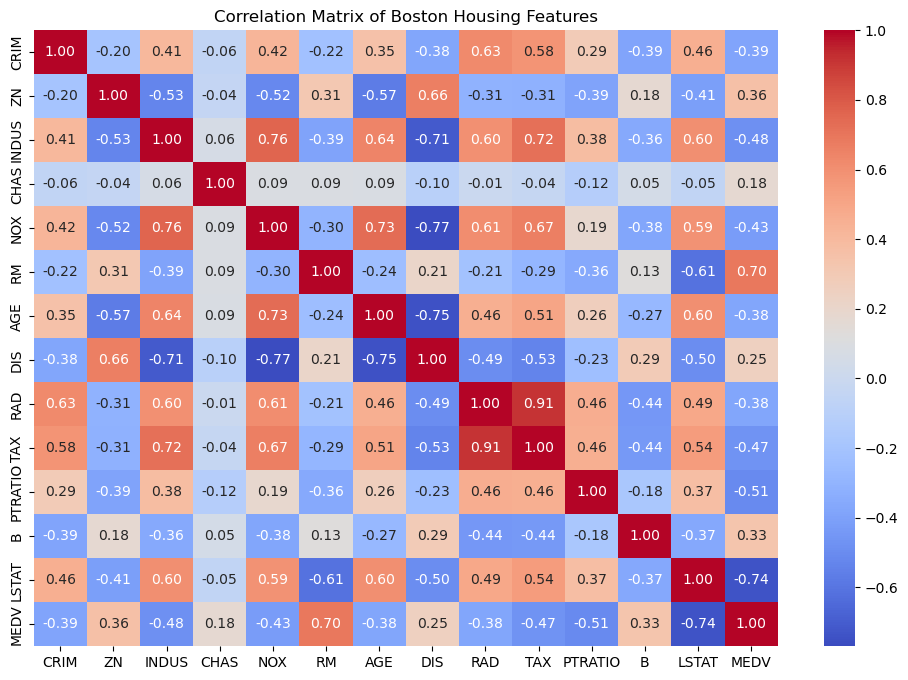

In [4]:
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Boston Housing Features")
plt.show()

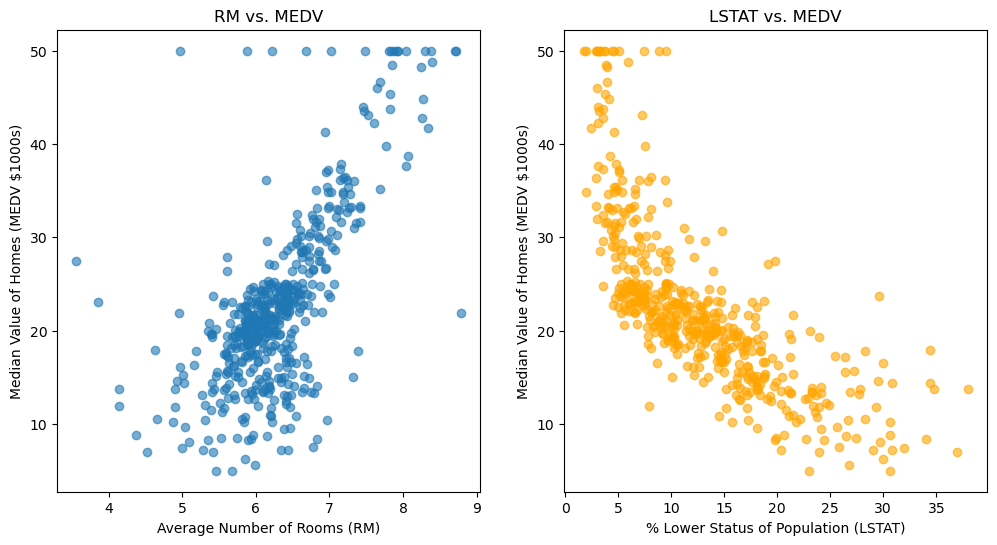

In [5]:
# YOUR FIRST PLOT
plt.figure(figsize=(12,6))

plt.subplot(121)
plt.scatter(df['RM'], df['MEDV'], alpha=0.6)
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Median Value of Homes (MEDV $1000s)')
plt.title('RM vs. MEDV')

plt.subplot(122)
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.6, color='orange')
plt.xlabel('% Lower Status of Population (LSTAT)')
plt.ylabel('Median Value of Homes (MEDV $1000s)')
plt.title('LSTAT vs. MEDV')
plt.show()

In [6]:
q1 = df['CRIM'].quantile(0.25)
q3 = df['CRIM'].quantile(0.75)
df['Crime_Level'] = pd.cut(df['CRIM'],bins=[-float('inf'), q1, q3, float('inf')],labels=['Low', 'Moderate', 'High'])

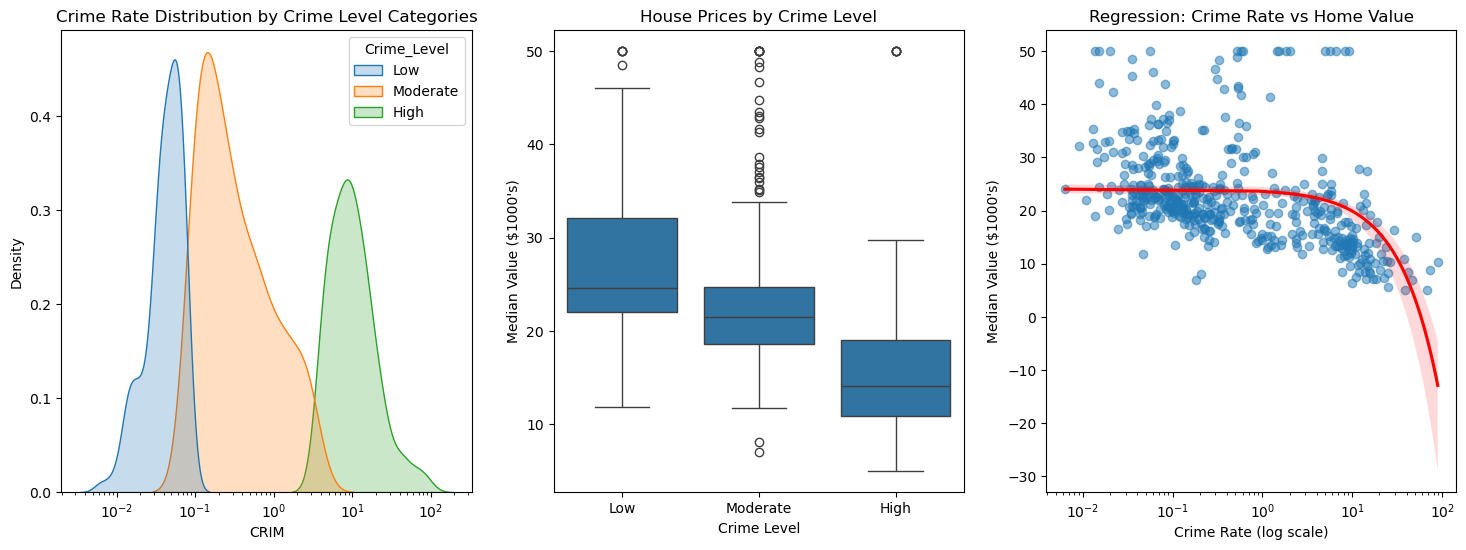

In [7]:
# YOUR SECOND PLOT

plt.figure(figsize=(18,6))
plt.subplot(131)
sns.kdeplot(data=df, x='CRIM', hue='Crime_Level', log_scale=True, fill=True)
plt.title("Crime Rate Distribution by Crime Level Categories")

plt.subplot(132)
sns.boxplot(data=df, x='Crime_Level', y='MEDV', order=['Low', 'Moderate', 'High'])
plt.title("House Prices by Crime Level")
plt.ylabel("Median Value ($1000's)")
plt.xlabel("Crime Level")

plt.subplot(133)
sns.regplot(data=df, x='CRIM', y='MEDV', scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.xscale('log')
plt.title("Regression: Crime Rate vs Home Value")
plt.xlabel("Crime Rate (log scale)")
plt.ylabel("Median Value ($1000's)")

plt.show()

Crime rate is a strong negative predictor of home value in this dataset. Properties in low-crime neighborhoods tend to command  higher prices, while high-crime areas see lower values. Small increases in crime rate at the low end have a disproportionately large impact on price.